# PRACTICE HR CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df=sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
X=df.drop("species", axis=1)

In [7]:
from scipy.cluster.hierarchy import linkage

In [8]:
hc_complete = linkage(X,"complete")
hc_ward = linkage(X, "ward")

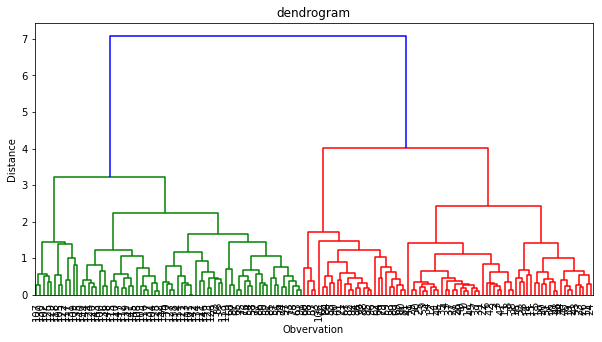

In [11]:
plt.figure(figsize =(10,5))
plt.title("dendrogram")
plt.xlabel("Obvervation")
plt.ylabel("Distance")

dendrogram(hc_complete, leaf_font_size = 10);

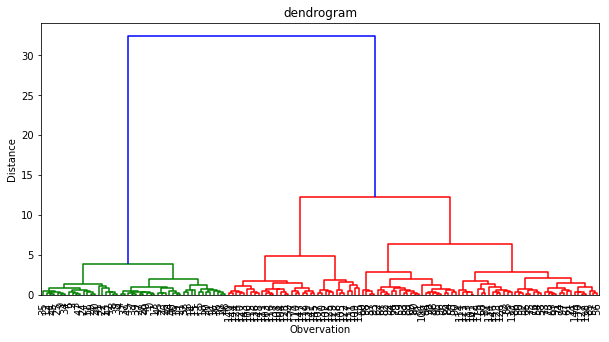

In [13]:
plt.figure(figsize =(10,5))
plt.title("dendrogram")
plt.xlabel("Obvervation")
plt.ylabel("Distance")

dendrogram(hc_ward, leaf_font_size = 10);

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
model = AgglomerativeClustering(n_clusters = 3, linkage="ward")
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [16]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [17]:
clusters=model.labels_

In [18]:
df["predicted_clusters"] = clusters

In [19]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


In [20]:
ct = pd.crosstab(df.predicted_clusters,df.species)
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [21]:
map_dict = {"virginica":2,
           "setosa":1,
           "versicolor":0}

In [22]:
df["original_classes"]= df.species.map(map_dict)

In [23]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [24]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
97,6.2,2.9,4.3,1.3,versicolor,0,0
14,5.8,4.0,1.2,0.2,setosa,1,1
127,6.1,3.0,4.9,1.8,virginica,0,2
126,6.2,2.8,4.8,1.8,virginica,0,2
37,4.9,3.6,1.4,0.1,setosa,1,1


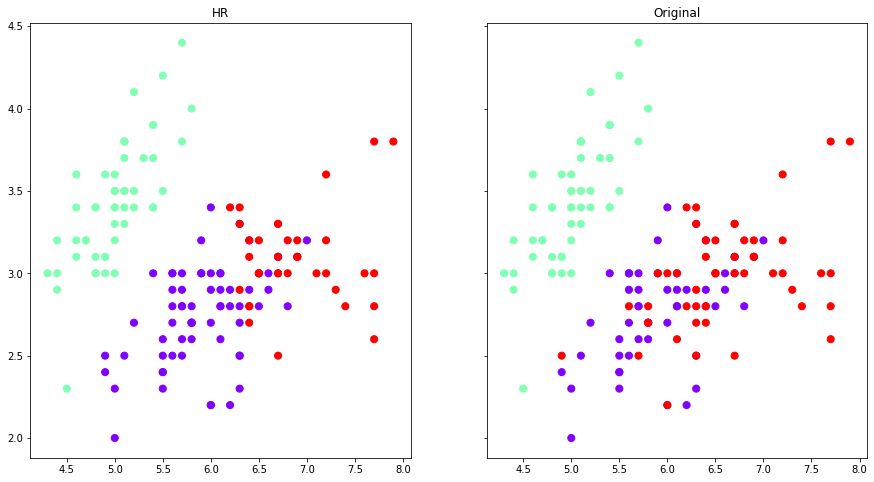

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,8))
ax1.set_title('HR')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow")
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 50, cmap = "rainbow")

In [29]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [32]:
print(f"Silhouette Score(n=3): {silhouette_score(X, model.labels_)}")

Silhouette Score(n=3): 0.5543236611296424


In [34]:
def get_indices(lst, el):
    a=[]
    for i in range(len(lst)):
        if lst[i] == el: a.append(i)
    return a




get_indices(['a', 'a', 'b', 'a', 'b', 'a'], 'a')  #, [0, 1, 3, 5])

[0, 1, 3, 5]